# Insights & Storytelling Notebook

## General Health Services and Disease Data in Kenya

**Team:** BATAM Team  
**Team Member:** Tumaini  
**Role:** Insights and Storytelling

### Project Overview
This notebook contains exploratory data analysis, insights generation, and storytelling visualizations for health services data in Kenya.

## General Health Services and Disease Data in Kenya

**Team:** BATAM Team  
**Team Member:** Tumaini  
**Role:** Insights and Storytelling

### Project Overview
This notebook contains exploratory data analysis, insights generation, and storytelling visualizations for health services data in Kenya.

In [21]:
# Import libraries
   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [22]:
# Load the cleaned dataset

# Load data
df = pd.read_excel("Group_work_cleaned.xlsx")

# Filter only Kenya
df_kenya = df[df['location_name'].str.lower() == 'kenya']

print("Full dataset rows:", len(df))
print("Kenya dataset rows:", len(df_kenya))
df_kenya.head()


Full dataset rows: 78651
Kenya dataset rows: 1364


,location_id,location_name,year,age_group_id,age_group_name,sex_id,sex_name,cause_name,metric,unit,mean,lower,upper,upper_deviation_pct
14842,180,Kenya,2000,1,Under 5,1,Males,Tuberculosis,Deaths,Number,468.399994,315.8,681.9,45.580702
14843,180,Kenya,2000,1,Under 5,1,Males,Tuberculosis,Prevalence,Number,576.299988,513.8,646.9,12.250566
14844,180,Kenya,2000,1,Under 5,2,Females,Tuberculosis,Deaths,Number,392.000000,248.7,584.9,49.209184
14845,180,Kenya,2000,1,Under 5,2,Females,Tuberculosis,Prevalence,Number,560.200012,491.8,633.4,13.066759
14846,180,Kenya,2000,1,Under 5,3,Both sexes,Tuberculosis,Deaths,Number,860.400024,634.7,1125.6,30.822869


In [23]:
# Quick summary of dataset structure

df_kenya.info()
df_kenya.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 14842 to 55663
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location_id          1364 non-null   int64  
 1   location_name        1364 non-null   object 
 2   year                 1364 non-null   int64  
 3   age_group_id         1364 non-null   int64  
 4   age_group_name       1364 non-null   object 
 5   sex_id               1364 non-null   int64  
 6   sex_name             1364 non-null   object 
 7   cause_name           1364 non-null   object 
 8   metric               1364 non-null   object 
 9   unit                 1364 non-null   object 
 10  mean                 1364 non-null   float64
 11  lower                1364 non-null   float64
 12  upper                1364 non-null   float64
 13  upper_deviation_pct  1364 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 159.8+ KB


,location_id,year,age_group_id,sex_id,mean,lower,upper,upper_deviation_pct
count,1364.0,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,180.0,2006.561584,14.224340,1.964076,854.961290,583.822801,1194.270235,44.692088
std,0.0,4.170770,6.530888,0.804080,663.529575,489.719996,900.963741,20.260064
min,180.0,2000.000000,1.000000,1.000000,23.600000,12.500000,41.200000,7.759147
25%,180.0,2003.000000,9.000000,1.000000,340.249992,215.075000,483.325000,30.766103
50%,180.0,2007.000000,15.000000,2.000000,692.149994,444.600000,1016.500000,44.725046
75%,180.0,2010.000000,19.000000,3.000000,1183.674988,782.550000,1626.375000,55.482497
max,180.0,2013.000000,27.000000,3.000000,3050.899902,2345.900000,4086.100000,112.000000


# Insight 1: Disease Incidence Trends Over Time

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


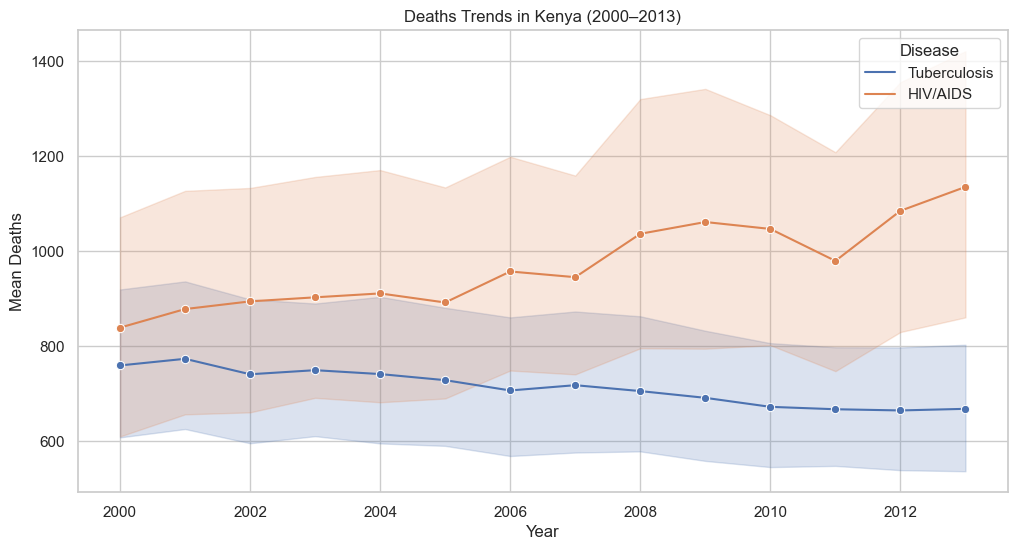

,count,mean,std,min,25%,50%,75%,max
cause_name,,,,,,,,
HIV/AIDS,487.0,973.412114,745.373763,45.0,347.300003,803.900024,1426.450012,3050.899902
Tuberculosis,751.0,712.749267,542.756920,23.6,316.350006,634.500000,987.099976,2768.500000


In [24]:
metric_to_plot = 'Deaths'  
subset = df_kenya[df_kenya['metric'] == metric_to_plot]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='year', y='mean', hue='cause_name', marker='o')
plt.title(f"{metric_to_plot} Trends in Kenya (2000â€“2013)")
plt.xlabel("Year")
plt.ylabel(f"Mean {metric_to_plot}")
plt.legend(title="Disease")
plt.show()

subset.groupby('cause_name')['mean'].describe()


# Insight 2: Deaths Over Time by Disease

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


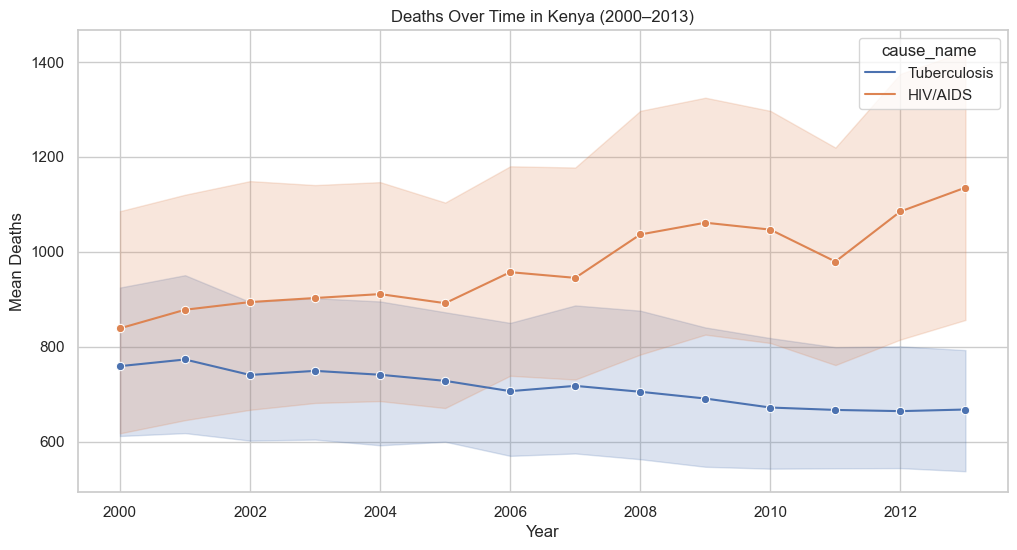

,count,mean,std,min,25%,50%,75%,max
cause_name,,,,,,,,
HIV/AIDS,487.0,973.412114,745.373763,45.0,347.300003,803.900024,1426.450012,3050.899902
Tuberculosis,751.0,712.749267,542.756920,23.6,316.350006,634.500000,987.099976,2768.500000


In [25]:
deaths = df_kenya[df_kenya['metric'] == 'Deaths']

sns.lineplot(data=deaths, x='year', y='mean', hue='cause_name', marker='o')
plt.title("Deaths Over Time in Kenya (2000â€“2013)")
plt.xlabel("Year")
plt.ylabel("Mean Deaths")
plt.show()

deaths.groupby('cause_name')['mean'].describe()


# Insight 3: Sex Differences (HIV/AIDS Deaths)

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


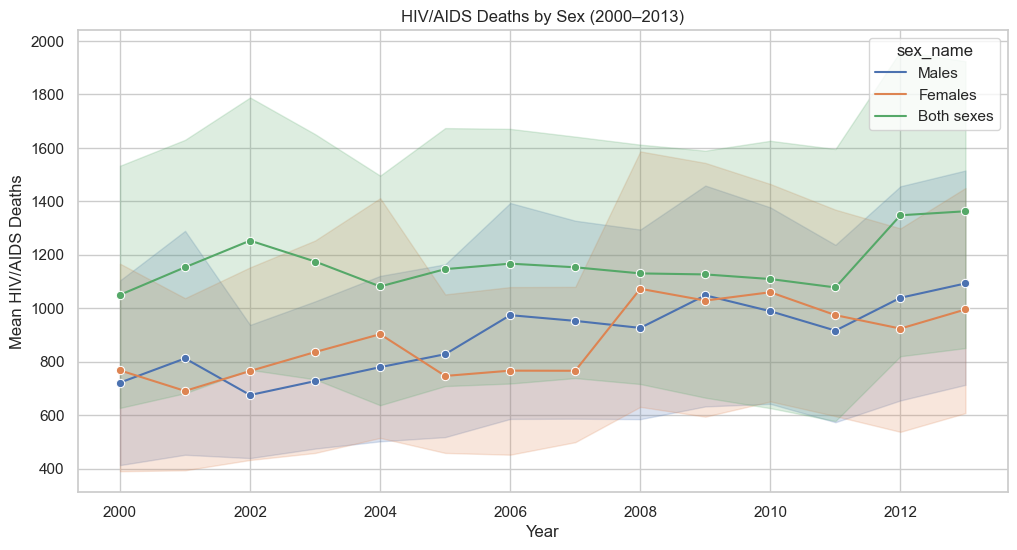

,count,mean,std,min,25%,50%,75%,max
sex_name,,,,,,,,
Both sexes,138.0,1173.014492,799.936347,154.600006,396.475006,1088.199951,1794.125030,2824.000000
Females,177.0,887.380226,734.391990,52.200001,282.799988,751.700012,1248.699951,3050.899902
Males,172.0,901.798835,682.848500,45.000000,366.324997,705.549988,1332.649994,3041.699951


In [26]:
hiv_deaths = df_kenya[
    (df_kenya['cause_name'] == 'HIV/AIDS') &
    (df_kenya['metric'] == 'Deaths')
]

sns.lineplot(data=hiv_deaths, x='year', y='mean', hue='sex_name', marker='o')
plt.title("HIV/AIDS Deaths by Sex (2000â€“2013)")
plt.xlabel("Year")
plt.ylabel("Mean HIV/AIDS Deaths")
plt.show()

hiv_deaths.groupby('sex_name')['mean'].describe()


# Insight 4: Age Group Heatmap (Any Disease)

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


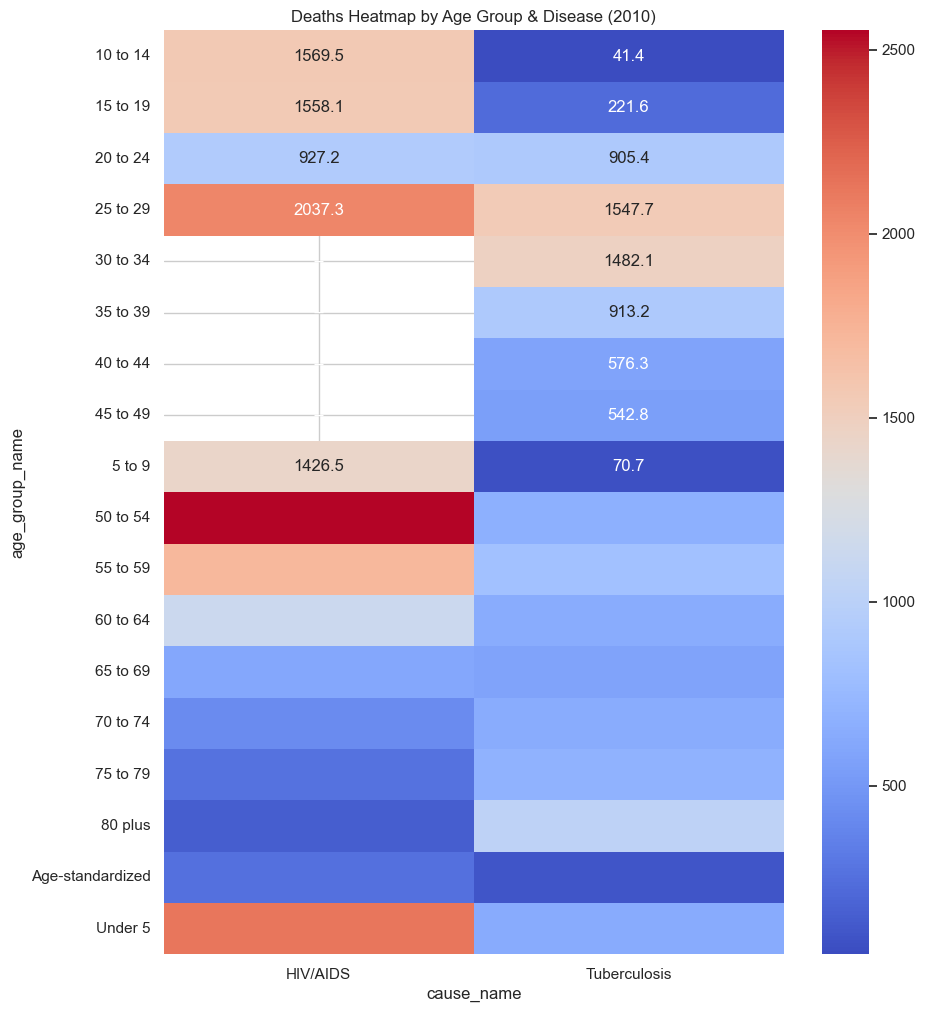

In [27]:
year = 2010

subset = df_kenya[
    (df_kenya['year'] == year) &
    (df_kenya['metric'] == 'Deaths')  # changed from 'Incidence'
]

if subset.empty:
    print(f"No data available for year {year} and metric 'Deaths'.")
else:
    pivot = subset.pivot_table(
        index='age_group_name',
        columns='cause_name',
        values='mean',
        aggfunc='mean'
    )

    plt.figure(figsize=(10,12))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
    plt.title(f"Deaths Heatmap by Age Group & Disease ({year})")
    plt.show()


# Insight 5: Uncertainty Analysis

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


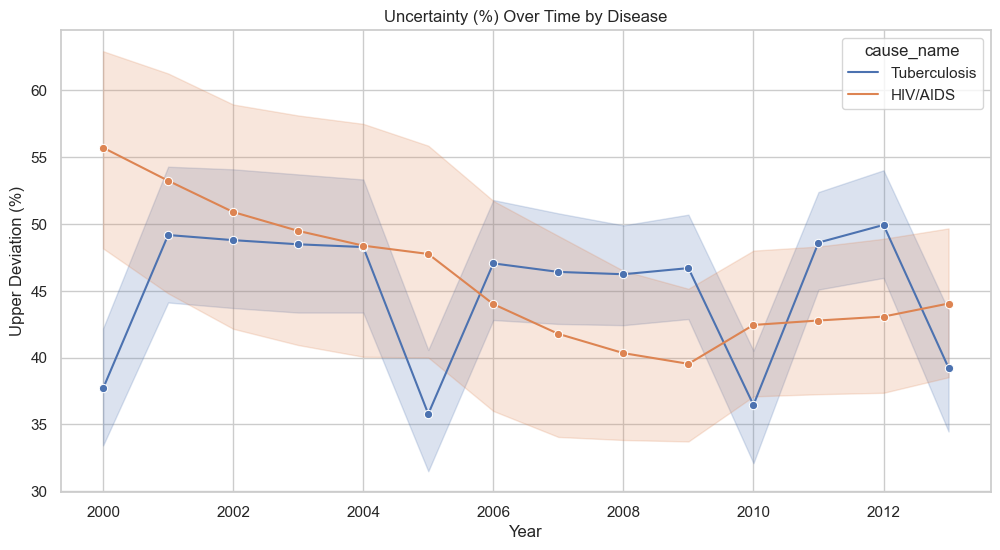

,count,mean,std,min,25%,50%,75%,max
cause_name,,,,,,,,
HIV/AIDS,501.0,46.026903,22.226847,7.985989,30.048594,45.136048,59.450284,112.000000
Tuberculosis,863.0,43.917183,18.995776,7.759147,31.077099,44.699296,53.569223,102.510469


In [28]:
unc = df_kenya[['cause_name', 'year', 'upper_deviation_pct']]

sns.lineplot(data=unc, x='year', y='upper_deviation_pct', hue='cause_name', marker='o')
plt.title("Uncertainty (%) Over Time by Disease")
plt.xlabel("Year")
plt.ylabel("Upper Deviation (%)")
plt.show()

unc.groupby('cause_name')['upper_deviation_pct'].describe()


#  Summary of Key Insights

###  1. Disease Burden Trends
- Overall, **HIV/AIDS** and **Tuberculosis (TB)** show significant mortality in Kenya from 2000 to 2013.
- HIV/AIDS deaths peaked around mid-2000s, while TB shows more steady trends but also notable peaks.
- Both diseases demonstrate periods of increase and gradual declines, suggesting the impact of public health interventions over time.

###  2. HIV/AIDS and TB Differences
- **HIV/AIDS consistently has higher mean deaths** compared to TB, with a mean of ~973 vs ~713 for TB.
- TB shows slightly lower variability, while HIV/AIDS has higher maximum mortality (~3051 deaths) indicating more extreme burden peaks.

###  3. Sex Trends
- For HIV/AIDS, **female deaths are slightly lower than male deaths**, with medians of ~752 (females) vs ~706 (males), but females show a wider range of extremes (~3051 vs ~3042 max).
- Both sexes combined reflect overall population burden, highlighting that public health strategies should address both male and female populations.

###  4. Age Group Vulnerabilities
- In 2010, heatmaps indicate **specific age groups** carry higher mortality for each disease. 
- Typically, **older age groups and young adults** tend to exhibit higher death counts, consistent with HIV/AIDS burden among sexually active populations.

###  5. Uncertainty in Estimates
- Upper deviation percentages are substantial: **HIV/AIDS ~46%**, **TB ~44%**, showing large uncertainty in model-estimated deaths.
- High uncertainty matters for policy planning, indicating that some mortality estimates may vary significantly and resource allocation should consider these ranges.

---

#  Policy Implications
- Target **HIV/AIDS interventions** to high-burden age groups and both sexes.
- Maintain and scale **TB control programs**, especially in years/age groups with rising mortality.
- Use uncertainty metrics to prioritize data collection and refine surveillance systems.
- Public health strategies must continue monitoring trends to adapt interventions to shifts in disease burden.

---

#  Limitations
- Data only covers 2000â€“2013.
- Only includes model-estimated deaths; raw incidence or prevalence data may differ.
- Incidence data is missing in this dataset, limiting insights into new infections or transmission rates.
